In [1]:
import math
import statistics
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.linear_model import LinearRegression

#### Statistical analysis of data obtained in the instrumental analysis laboratory course.
#### The data just below are data to generate the calibration curve, and data from samples analyzed in the laboratory.

In [12]:
curve_x = {"label": "Concentration",
            "info": "Concentration of the Fe curve",
            "data": [1, 2, 3, 4, 5]}

abs = lambda b, r: -math.log10(b/r)

curve_y = {
            "label": "ABS",
            "info": "ABS do Fe",
            "data": [abs(1.02, 1.27), 
                     abs(0.99, 1.53), 
                     abs(0.97, 1.91), 
                     abs(0.97, 2.41), 
                     abs(0.96, 3.03)]
          }

reference_value = 166.67

measures = {"label": "ABS",
            "diluition": 25 * 2.5,
            "data": [abs(0.96, 1.96), 
                     abs(0.96, 1.96), 
                     abs(0.96, 1.97),]}

In [23]:
def coeficients(X, y):

    df = DataFrame()
    df['x'] = X
    df['y'] = y

    # Turn values into dataframes
    x_v = df[['x']]
    y_v = df[['y']]

    # Create and train our linear model
    model = LinearRegression()
    model.fit(x_v, y_v)

    # Appliyng our data
    if measures["label"] == curve_y["label"]:
        x_data = lambda y: ((y - model.intercept_[0])/ model.coef_[0][0]) * measures["diluition"]
        result = [ x_data(i) for i in measures["data"]]
        type_of_data = curve_x["label"]


    elif measures["label"] == curve_x["label"]:
        y_data = lambda x: (model.coef_[0][0] * x + model.intercept_[0]) * measures["diluition"]
        result = [ y_data(i) for i in measures["data"]]
        type_of_data = curve_y["label"]


    return {
        "Equation": f"{curve_y['label']} = {model.coef_[0][0]:.4f} x {curve_x['label']} + {model.intercept_[0]:.4f}",
        "Slope": model.coef_[0][0],
        "Intercept": model.intercept_[0], 
        "R^2": model.score(x_v, y_v),
        f"Measures ({measures['label']})": measures["data"],
        f"Result ({type_of_data})": result, 
        "Average": np.mean(result),
        "Standard deviation (s)": statistics.stdev(result),   
    }

In [24]:
data_dict = coeficients(curve_x["data"], curve_y["data"])
data_items = data_dict.items()
data_list = list(data_items)

df = DataFrame(data_list)
df

,0,1
0,Equation,ABS = 0.1014 x Concentration + -0.0096
1,Slope,0.101412
2,Intercept,-0.00965
3,R^2,0.999683
4,Measures (ABS),"[0.30998483831690765, 0.30998483831690765, 0.3..."
5,Result (Concentration),"[196.9892255991305, 196.9892255991305, 198.351..."
6,Average,197.443261
7,Standard deviation (s),0.786413


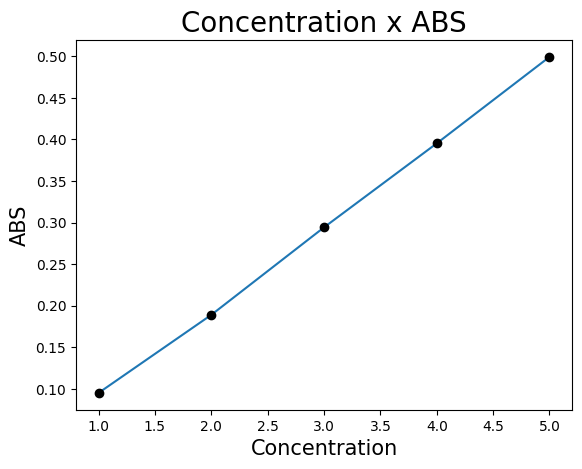

In [26]:
# Calibration curve

plt.plot(curve_x["data"], curve_y["data"])
plt.plot(curve_x["data"], curve_y["data"], 'o', color='black')
plt.title(f"{curve_x['label']} x {curve_y['label']}", fontsize=20)
plt.xlabel(curve_x["label"], fontsize=15)
plt.ylabel(curve_y["label"], fontsize=15)
plt.show()